In [659]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [660]:
(0.006)*10

0.06

### Modelo de Concentración Parasitaria

In [661]:
k1 = 0.15 #Tasa de eliminación de estomágo/absorción sangre [1/horas]
k2 = 0.2 #Tasa de eliminación de estógamo/absorción sistema excretor[1/horas]
k3 = 0.06 #Tasa de eliminación de sangre/absorción sistema excretor [1/horas]
k4 = (0.004)/2 #Tasa de eliminción de sistema excretor/absorción sangre[1/horas]
k5 = (1/(4*24))*8 #Tasa de eliminación sistema excretor[1/horas]

E0 = 100/(1*10**6) #número de parásitos/microlitro en ingesta
S0 = 0 #número de parásitos/microlitro en sangre
C0 = 0 #número de parásitos/microlitro en sistema excretor

dt = 0.01
tmax = 96

def modelo_parasitos(z,t):
    E, S, C = z
    dEdt = -(k1*E) -(k2*E)
    dSdt = (k1*E) - (k4*C) - (k3*S)
    dCdt = (k2*E) + (k3*S) - (k4*C) -(k5*C)
    return  np.array([dEdt, dSdt, dCdt])

t = np.arange(0, tmax, dt)
c0 = np.array([E0, S0, C0])

solution = odeint(modelo_parasitos, c0, t)

Text(0, 0.5, 'Parásito $ \\cdot \\mu l^{-1}$')

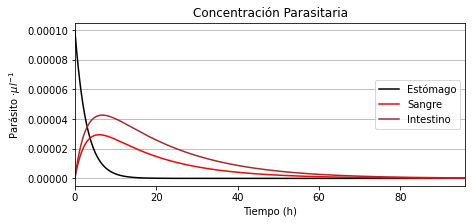

In [662]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.plot(t, solution[:,0], color='black', label='Estómago')
plt.plot(t, solution[:,1], color='red', label='Sangre')
plt.plot(t, solution[:,2], color='brown', label='Intestino')
plt.legend(loc=5)
plt.xlim(0, tmax)
plt.grid(True, axis='y')
plt.title('Concentración Parasitaria')
plt.xlabel('Tiempo (h)')
plt.ylabel(r'Parásito $ \cdot \mu l^{-1}$')
# plt.savefig('Concentracion_parasitaria_short_2.eps', dpi=400, bbox_inches = "tight")
# plt.xlim(100, 120)
# plt.ylim(-0.000001,0.00002)
# plt.yscale('log')

### Modelo de Diálisis

En general, entre aproximadamente 6 y 24 mg/dL

In [663]:
QA = 0.1    # Caudal de sangre (dl/min)
QB = 5      # Caudal de líquido dializador (dl/min)

CAin = 90   # Concentración de toxina en sangre (mg/dl)
CBin = 0    # Concentración de toxina en líquido dializador (mg/dl)

k = 0.65    # Tasa de difusión (dl/min)

CA0 = 50    # Concentración inicial de toxina en sangre (mg/dl)
CB0 = 0     # Concentración inicial de toxina en líquido dializador (mg/dl)

VA = 5      #  dl
VB = 2.5    #  dl

dt = 0.01   
tmax = 40

def modelo_dialisis(z,t):
    CA, CB = z
    dCAdt = (QA*(CAin - CA) - k * (CA-CB)) / VA
    dCBdt = (QB*(CBin - CB) + k * (CA-CB)) / VB
    return  np.array([dCAdt, dCBdt])

t = np.arange(0, tmax, dt)
c0 = np.array([CA0, CB0])

solution = odeint(modelo_dialisis, c0, t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


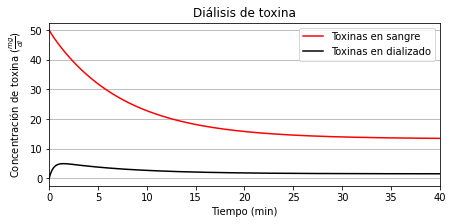

In [668]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.plot(t, solution[:,0], color='red', label='Toxinas en sangre')
plt.plot(t, solution[:,1], color='black', label='Toxinas en dializado')
plt.legend(loc=1)
plt.xlim(0, tmax)
plt.grid(True, axis='y')
plt.title('Diálisis de toxina')
plt.xlabel('Tiempo (min)')
plt.ylabel(r'Concentración de toxina ($\frac{mg}{dl}$)')
# plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")